In [1]:
rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, showtext, srvyr)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)
font_add_google("Poppins", "pop")
showtext_auto()

Cargando paquete requerido: pacman

Using GitHub PAT from the git credential store.




rlang  (1.1.4 -> 1.1.6) [CRAN]
glue   (1.7.0 -> 1.8.0) [CRAN]
cli    (3.6.3 -> 3.6.5) [CRAN]
tibble (3.2.1 -> 3.3.0) [CRAN]


Installing 4 packages: rlang, glue, cli, tibble

Warning message:
"package 'tibble' is in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpOsGWcn\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpOsGWcn\remotes7a4473683da8\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Installing package into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



In [2]:
years<-c("2016", "2018", "2020", "2022")

In [3]:
# Definir URL base y parte intermedia
url_basica <- "https://www.inegi.org.mx/contenidos/programas/enigh/nc/"
segunda_parte <- "microdatos/enigh"
options(timeout = 600)
# Definir los años y los tipos de archivos a descargar
years <- c("2018", "2020", "2022","2024")
tipos <- c("ns_poblacion", "ns_trabajos","ns_viviendas")  # Tipos de archivos

# Crear la carpeta de destino si no existe
if (!dir.exists("data")) {
  dir.create("data")
}

# Descargar, descomprimir y renombrar los archivos
for (year in years) {
  for (tipo in tipos) {
    # Construir URL y nombres de archivo
    url <- paste0(url_basica, year, "/", segunda_parte, year, "_", tipo, "_csv.zip")
    zip_destfile <- paste0("data/", year, "_", tipo, ".zip")

    # Descargar solo si el archivo no existe
    if (!file.exists(zip_destfile)) {
      download.file(url, destfile = zip_destfile, mode = "wb")
    } else {
      message("Archivo ya descargado: ", zip_destfile)
    }

    # Extraer archivos en una subcarpeta específica
    extract_dir <- paste0("data/", year, "_", tipo)
    if (!dir.exists(extract_dir)) {
      dir.create(extract_dir)
    }

    unzip(zip_destfile, exdir = extract_dir)

    # Buscar el archivo CSV dentro de la carpeta extraída
    extracted_files <- list.files(extract_dir, pattern = "\\.csv$", full.names = TRUE)

    if (length(extracted_files) == 1) {
      # Determinar el nuevo nombre con formato adecuado
      new_name <- paste0("data/", tipo, "_", year, ".csv")

      # Mover el archivo al directorio principal y renombrarlo
      file.rename(extracted_files, new_name)

      message("Archivo renombrado y movido: ", new_name)
    } else {
      message("Error: No se encontró un archivo CSV único en ", extract_dir)
    }
  }
}


Archivo ya descargado: data/2018_ns_poblacion.zip

Archivo renombrado y movido: data/ns_poblacion_2018.csv

Archivo ya descargado: data/2018_ns_trabajos.zip

Archivo renombrado y movido: data/ns_trabajos_2018.csv

Archivo ya descargado: data/2018_ns_viviendas.zip

Archivo renombrado y movido: data/ns_viviendas_2018.csv

Archivo ya descargado: data/2020_ns_poblacion.zip

Archivo renombrado y movido: data/ns_poblacion_2020.csv

Archivo ya descargado: data/2020_ns_trabajos.zip

Archivo renombrado y movido: data/ns_trabajos_2020.csv

Archivo ya descargado: data/2020_ns_viviendas.zip

Archivo renombrado y movido: data/ns_viviendas_2020.csv

Archivo ya descargado: data/2022_ns_poblacion.zip

Archivo renombrado y movido: data/ns_poblacion_2022.csv

Archivo ya descargado: data/2022_ns_trabajos.zip

Archivo renombrado y movido: data/ns_trabajos_2022.csv

Archivo ya descargado: data/2022_ns_viviendas.zip

Archivo renombrado y movido: data/ns_viviendas_2022.csv

Archivo ya descargado: data/2024_n

In [4]:
estima_prestacion <- function(year, variable = "prestacion") {

  # 1) Leer población
  poblacion <- read_csv(paste0("data/ns_poblacion_", year, ".csv"),
                        show_col_types = FALSE)

  # 2) Para 2016, 2018 y 2020: unir pesos/estratos desde viviendas
  if (year %in% c(2016, 2018, 2020)) {
    vivienda <- read_csv(paste0("data/ns_viviendas_", year, ".csv"),
                         show_col_types = FALSE) |>
      select(folioviv, factor, upm, est_dis)

    poblacion <- poblacion |>
      left_join(vivienda, by = "folioviv")
  }

  # 3) Identificador de entidad y grupos de edad
  poblacion <- poblacion |>
    mutate(
      cve_ent = case_when(
        nchar(folioviv) == 9  ~ paste0("0", substr(folioviv, 1, 1)),
        nchar(folioviv) == 10 ~ substr(folioviv, 1, 2),
        TRUE ~ NA_character_
      )
    ) |>
    filter(cve_ent == "09") |>
    mutate(
      grupo_edad = case_when(
        edad >= 0  & edad <= 5   ~ "0-5",
        edad >= 6  & edad <= 11  ~ "6-11",
        edad >= 12 & edad <= 14  ~ "12-14",
        edad >= 15 & edad <= 17  ~ "15-17",
        edad >= 18 & edad <= 24  ~ "18-24",
        edad >= 25 & edad <= 29  ~ "25-29",
        edad >= 30 & edad <= 34  ~ "30-34",
        edad >= 35 & edad <= 39  ~ "35-39",
        edad >= 40 & edad <= 44  ~ "40-44",
        edad >= 45 & edad <= 49  ~ "45-49",
        edad >= 50 & edad <= 54  ~ "50-54",
        edad >= 55 & edad <= 59  ~ "55-59",
        edad >= 60 & edad <= 64  ~ "60-64",
        edad >= 65 & edad <= 69  ~ "65-69",
        edad >= 70 & edad <= 74  ~ "70-74",
        edad >= 75 & edad <= 79  ~ "75-79",
        edad >= 80 & edad <= 84  ~ "80-84",
        edad >= 85              ~ "85+",
        TRUE ~ NA_character_
      )
    )

  # 4) Leer trabajos y construir indicador pres_5 a nivel persona
  trabajos <- read_csv(paste0("data/ns_trabajos_", year, ".csv"),
                       show_col_types = FALSE) |>
    mutate(
      cve_ent = case_when(
        nchar(folioviv) == 9  ~ paste0("0", substr(folioviv, 1, 1)),
        nchar(folioviv) == 10 ~ substr(folioviv, 1, 2),
        TRUE ~ NA_character_
      )
    ) |>
    filter(cve_ent == "09") |>
    # pres_5: 1 si reporta la prestación (códigos "05"/"5"/5), 0 en otro caso/NA
    mutate(pres_5 = case_when(
      pres_5 %in% c("05", "5", 5) ~ 1L,
      TRUE ~ 0L
    )) |>
    group_by(folioviv, foliohog, numren) |>
    summarise(pres_5 = as.integer(sum(pres_5, na.rm = TRUE) >= 1),
              .groups = "drop") |>
    mutate(ocupado = 1L)

  # 5) Quedarse solo con personas ocupadas (las que aparecen en trabajos)
  ocupados <- poblacion |>
    left_join(trabajos, by = c("folioviv", "foliohog", "numren")) |>
    filter(ocupado == 1L)

  # Chequeo mínimo para el diseño muestral
  if (!all(c("upm", "est_dis", "factor") %in% names(ocupados))) {
    stop("Faltan columnas del diseño muestral (upm, est_dis, factor). Revisa las uniones/archivos.")
  }

  # 6) Diseño muestral
  dm <- ocupados |>
    as_survey_design(ids = upm, weights = factor, strata = est_dis)

  # 7) Estimación
  prestacion <- dm |>
    mutate(
      ident_jovenes = if_else(
        grupo_edad %in% c("12-14", "15-17", "18-24", "25-29"),
        "joven", "otros"
      )
    ) |>
    group_by(ident_jovenes, pres_5) |>
    summarise(
      ocupados = survey_total(vartype = "cv"),
      pct      = survey_prop(vartype = "cv")
    ) |>
    ungroup() |>
    mutate(pct = round(pct * 100, 1)) |>
    # Nota: aquí estás filtrando quienes **no** tienen la prestación (0).
    # Si quisieras los que sí tienen la prestación, cambia a `filter(pres_5 == 1)`.
    filter(pres_5 == 0)|>
    mutate(year=year)|>
    filter(ident_jovenes == "joven")

  if (identical(variable, "prestacion")) {
    return(prestacion)
  } else {
    return("Variable no reconocida. Debe ser 'prestacion'.")
  }
}


In [5]:
print("Del total de jóvenes ocupados, ¿qué porcentaje recibe crédito para vivienda como prestación laboral?")
tabla_prestacion <- map_dfr(years, estima_prestacion, variable = "prestacion")
tabla_prestacion

[1] "Del total de jóvenes ocupados, ¿qué porcentaje recibe crédito para vivienda como prestación laboral?"


Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"
Warning message:
"One or mo

ident_jovenes,pres_5,ocupados,ocupados_cv,pct,pct_cv,year
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
joven,0,707508,0.05903325,70.5,0.02998694,2018
joven,0,607783,0.06102765,69.2,0.03197294,2020
joven,0,671326,0.05563368,72.4,0.02790521,2022
joven,0,626825,0.06027938,69.0,0.03404968,2024


In [6]:
tcma<-((tabla_prestacion$pct[tabla_prestacion$year==2022]/tabla_prestacion$pct[tabla_prestacion$year==2018])^(1/(2022-2018))-1)

tcma

[1] 0.006670547

In [7]:
extendido<-data.frame(year=2025:2045)
extendido$pct<-tabla_prestacion$pct[tabla_prestacion$year==2024]*cumprod(rep(1+tcma,length(2025:2045)))
extendido%>%
mutate(pct=round(pct,2))

year,pct
<int>,<dbl>
2025,69.46
2026,69.92
2027,70.39
2028,70.86
2029,71.33
2030,71.81
2031,72.29
2032,72.77
2033,73.25


In [8]:
  serie_completa <- dplyr::bind_rows(
    tabla_prestacion %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "pct"),

    extendido %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2024,var="pct"))
serie_completa

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2018,70.50000,70.50000,70.50000
2020,69.20000,69.20000,69.20000
2022,72.40000,72.40000,72.40000
2024,69.00000,69.00000,69.00000
2025,69.46027,69.73811,69.18353
2026,69.92361,70.48411,69.36756
2027,70.39003,71.23810,69.55207
2028,70.85957,72.00015,69.73707
2029,71.33225,72.77035,69.92256


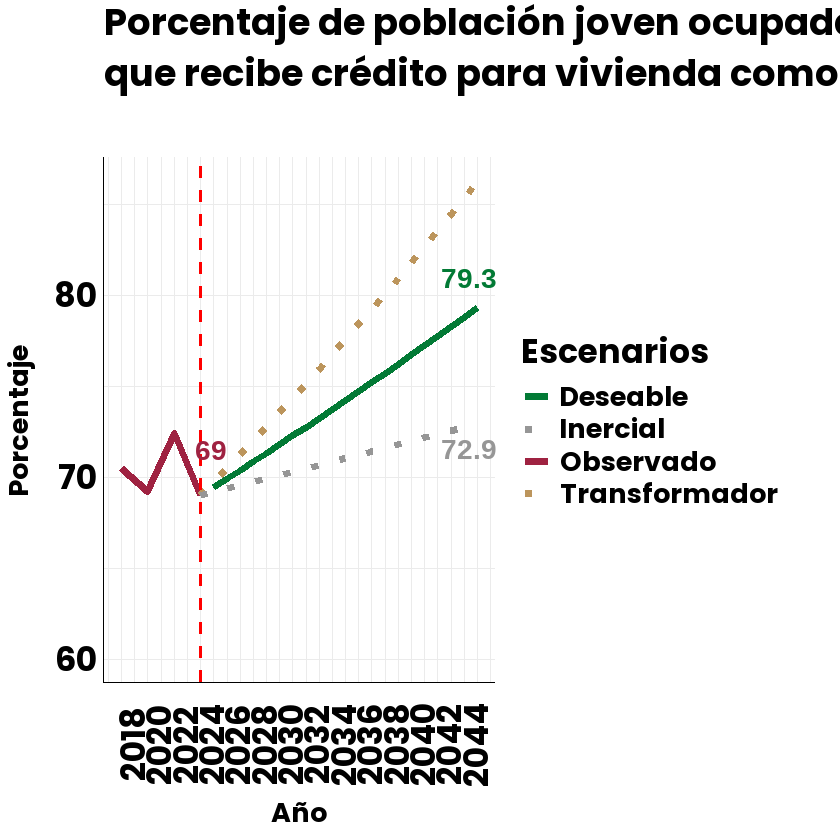

In [15]:
grafica_bonita(
  data = serie_completa,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población joven ocupada 
que recibe crédito para vivienda como prestación laboral en Ciudad de México
",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
    desplazamiento_ano_base=c(0.8, 2.5),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 60
)

ggsave("H:/Mi unidad/pgd/graficas/jov_ocup_credvivi.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")